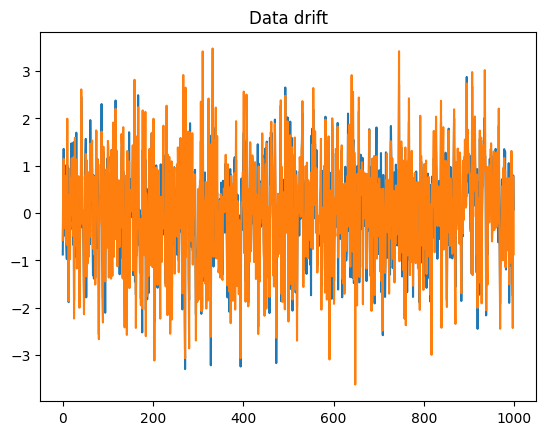

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the number of samples, features, and drift levels
num_samples = 1000
num_features = 3
num_drifts = 1

# Generate a synthetic dataset with normal distribution
X = np.random.normal(0, 1, size=(num_samples, num_features))
y = np.array([1 if np.sum(x) > 0 else 0 for x in X])

# Define the levels of drift
drift_levels = ["Drift level {}".format(i+1) for i in range(num_drifts)]

# Initialize the drift percentages list
drift_percentages = []

# Generate data drift for each drift level
for i in range(num_drifts):
    # Select the subset of features to modify
    modified_features = np.random.choice(num_features, size=1, replace=False)
    
    # Modify the selected features by adding a random amount of noise
    X[:, 2] = X[:,1] + np.random.normal(0, 0.5, size=X[:,1].shape)
    
    # Define the new target variable as a binary function of the modified features
    y_new = np.array([1 if np.sum(x) > 0 else 0 for x in X])
    
    # Calculate the percentage of samples that changed their target label due to the drift
    drift_percentage = np.sum(y != y_new) / num_samples * 100
    drift_percentages.append(drift_percentage)
    
    # Update the target variable for the next drift level
    y = y_new

# Create a DataFrame with the synthetic dataset
df = pd.DataFrame(X, columns=["Feature {}".format(i+1) for i in range(num_features)])
df["Target"] = y

# Plot the drift levels
plt.plot(range(X.shape[0]), X[:, 1], label='Feature 1')
plt.plot(range(X.shape[0]), X[:, 2], label='Feature 1 - Drifted')
plt.title("Data drift")
plt.show()





In [32]:
import numpy as np

X = np.random.normal(0, 50, size=(30, 3))
p = np.random.randint(30, 70, size=(30, 3))

X_new = X + p
X_mod = np.hstack((X, X_new))
print(X_mod.shape)

(30, 6)


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
df = pl.DataFrame(X_mod, columns=["X1", "X2", "X3", "X1_drifted", "X2_drifted", "X3_drifted"])

/var/folders/4n/8bthl6px4g58mf6nr_w4jqp40000gn/T/ipykernel_25246/149338222.py:4: DeprecationWarning: `columns` is deprecated as an argument to `__init__`; use `schema` instead.
  df = pl.DataFrame(X_mod, columns=["X1", "X2", "X3", "X1_drifted", "X2_drifted", "X3_drifted"])


<AxesSubplot: >

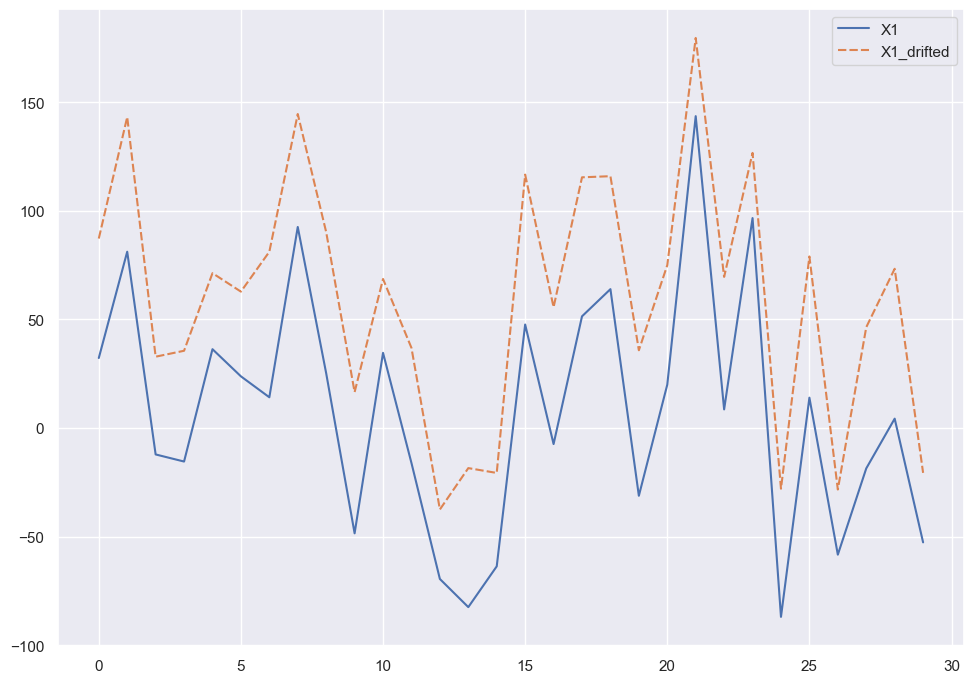

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(
    data=df[['X1', 'X1_drifted']].to_pandas(),
)